In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1: Iterative Method

Given equation to solve is $f(\theta) = \theta \sec{\theta} - 1 = 0$ (given a = 1). The given range of $\theta$ ensures that the signs of $f(\theta)$ change at the endpoints (and thus $\theta_0$) is a value between $0$ and $\pi/2$. 

So we first find a function $g(\theta)$ such that $\theta = g(\theta)$. We can easily see here that by rearranging the given equation, we get $g(\theta) = \cos{\theta}$ .

We now check that $|g'(\theta)| = \sin{\theta} < 1$ is satisfied, say at $\theta = 0$. Now we apply the iterative method $\theta_n = g(\theta_{n-1})$ and find the root.

In [60]:
def fixed_point_iteration(g, x0, tol):
    x1 = g(x0)
    i = 0
    est = np.array([])
    while abs(x1 - x0) > tol:
        x0 = x1
        x1 = g(x0)
        est = np.append(est, x1)
        i = i+1
    return x1,i,est # returns the final root, the number of iterations used, and the root estimate at every iterative step

In [64]:
# Defining g(x) such that x = g(x)
def g(x):
    return np.cos(x)

root, iterations, est = fixed_point_iteration(g, 284, 1e-4)

print("Root of given function is", root)
print("Number of iterations required is", iterations)


Root of given function is 0.7391221405918983
Number of iterations required is 23


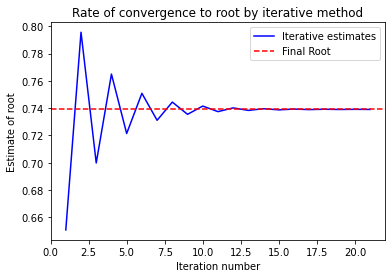

In [62]:
root, iternum, estimates = fixed_point_iteration(g, 100, 1e-4)

iterindex = np.array([i for i in range(1,iternum+1)])

plt.plot(iterindex, estimates, color='b', label="Iterative estimates")
plt.xlabel("Iteration number")
plt.ylabel("Estimate of root")
plt.axhline(root, color='r', linestyle='--', label="Final Root")
plt.title("Rate of convergence to root by iterative method")
plt.legend()
plt.show()

### Question 2: Convergence of Newton-Raphson method

In [6]:
def rootNR(x0, f, f1, e=1e-10, Nt=1000):
    n = 0
    if x0==0:
        print("Bhai koi aur starting value dede please.")
    else:
        est = np.array([])
        while np.abs(f(x0))>e and n<Nt:
            x1 = x0 - f(x0)/f1(x0)
            x0 = x1
            est = np.append(est, x1)
            n = n + 1
        return x1, f(x1), n, est
    

In [75]:
def f(x):
    return x**4 - 3*x*x - 2 

def f1(x):
    return 4*(x**3) - 6*x

x0 = 1

root, val_at_root, iteraions, estimates = rootNR(x0, f , f1, e=1e-10, Nt=3)

print("Root of function at the current used starting point is ", root)
print("Number of iterations required is", iterations)

Root of function at the current used starting point is  -1.0
Number of iterations required is 23


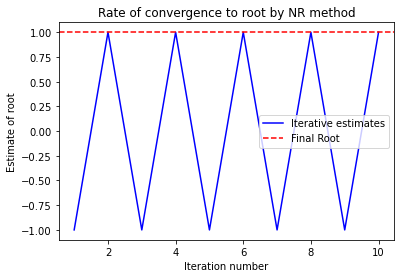

In [58]:
root, val_at_root, iternum, estimates = rootNR(x0, f , f1, e=1e-10, Nt=10)

iterindex = np.array([i for i in range(1,iternum+1)])

plt.plot(iterindex, estimates, color='b', label="Iterative estimates")
plt.xlabel("Iteration number")
plt.ylabel("Estimate of root")
plt.axhline(root, color='r', linestyle='--', label="Final Root")
plt.title("Rate of convergence to root by NR method")
plt.legend()
plt.show()

### Comments about convergence 

Starting at a seed value of $x_0 = 1$ and plotting the estimate of the root at every iteration along with the iteration number itself shows us that the estimate bounces back and forth between 1 and -1. Specifically, it ends at +1 for an even number of max iterations, while at -1 for an odd number of iterations, never really converging to the true root at any arbitrarily large value of $N_t$. 

Thus, the starting point of $x_0 = 1$ is really part of a problematic periodic cycle which may come up frequently if the starting point is not chosen wisely (or as in this case, chosen too wisely! :)))

##### Other important cases where Newton-Raphson method fails to converge are -

1. Real root does not exist:  For say $f(x) = 1 + x^2$, no real root exists, so the estimates will move around chaotically
2. Initial guess is a critical point for $f(x)$ i.e. where $f'(x) = 0$:  We can easily observe this failure point by looking at the iteration relation used for this method, since the RHS has $f'(x)$ in the denominator.

### Example of failing function

1. The obvious example can be $f(x) = 1 + x^2$, since it has no root. 

2. But if we were to specifically look where NR method fails, we can take any function f and start at its critical point i.e. extrema, and it won't converge. This is due to the nature of the iterative expression in the NR method itself, which has an $f'(x)$ in the denominator, which is why this method fails in such cases.

Example can be $f(x) = \frac{1}{2}x^2 - 2x$ starting with $x_0 = 2$.


## Question 3

In [23]:
# defining bisection function

def rootbisect(a,b,f, e=1e-10, Nt = 1000):  
    n = 0
    if f(a)*f(b)>=0:
        print("No root in given range.")
    else:
        c = (a+b)/2                       # need to assign c before referencing it in the next loop
        while np.abs(f(c))>e and n<Nt:
            c = (a+b)/2                   # need to update c in the loop again 
            n = n + 1
            if f(c)*f(a)<0:
                b = c
            else:
                a = c
        return c, n, f(c)

### Using Bisection Method

In [188]:
# Defining function as given in the question
def f1(x):
    return x**2 - 4*x*np.sin(x) + (2*np.sin(x))**2

# Differential of f1 as given (for NR method)
def f2(x):
    return 2*x - 4*x*np.cos(x) - 4*np.sin(x) + 8*np.sin(x)*np.cos(x)


rootbisect(-30,31,f1,e=1e-10,Nt=1000)

No root in given range.


### How to modify given function for bisection to work

We can see that the bisection method is failing to give us any root when the input function is used as given directly. This is due to the nature of the first "if" conditional used in the function definition, which requires the the function value changes sign once (or any odd number of times) between a and b. However, if a and b are far apart enough such the function intersects the x axis twice in between then i.e changes signs an even number of times, then that first if conditional still gets fulfilled, resulting in the method unable to provide us with a root, even though there does lie a root in that range of a and b. 

However, for the given function, we can get rid of this by writing it cleverly and getting of the squared terms. 

We write $f(x) = x^2 - 4x\sin{x} + (2\sin{x})^2 = (x - 2\sin{x})^2 $
The roots of $ (x - 2\sin{x})^2 $ would just be the root of $g(x) = x - 2\sin{x}$, but repeated, due to the squaring. Thus, for all practice purposes, instead of given $f(x)$, we can use the equivalent $g(x)$ in the bisection method, and get the positive root. Following cell of code implements this  

In [186]:
# Rewriting given function cleverly to make the bisection method work successfully
def f3(x):
    return x - 2*np.sin(x)

# Differential of f3 as manipulated above
def f4(x):
    return 1 - 2*np.cos(x)


# Calling function f3,  written for bisection method to work

root, iterations, val_at_root = rootbisect(-30,31,f3, e=1e-10, Nt = 1000)

print("Root of function at the current used boundaries ", root)
print("Number of iterations required is", iterations)

Root of function at the current used boundaries  1.8954942670607124
Number of iterations required is 37


### Using Newton-Raphson Method

In [105]:
# Using manipulated function

root, val_at_root, iterations, estimates = rootNR(20, f3, f4, e=1e-10, Nt=1000)

print("Root of function from the current starting point is", root)
print("Number of iterations required is", iterations)

Root of function from the current starting point is 1.8954942670339812
Number of iterations required is 769


In [108]:
# Using function as given (without manipulation)

root, val_at_root, iterations, estimates = rootNR(-30, f1, f2, e=1e-10, Nt=1000)

print("Root of function from the current starting point is", root)
print("Number of iterations required is", iterations)

Root of function from the current starting point is 1.8954994127419678
Number of iterations required is 22


### Comments on convergence by both methods 


The Newton-Raphson method gives us the roots of the given function, with our without manipulating its current form. However, there's no easy way from this method to guarantee that the seed value used will end up on the positive root and not the negative one. Whereas, bisection method always gives us the positive root, when the input $f(x)$ is manipulated appropriately, as explained above. 

### Rewriting NR function to estimate error (rate of convergence)

In [112]:
def rootNR_err(x0, f, f1, e=1e-10, Nt=1000):
    n = 0
    if x0==0:
        print("Bhai koi aur starting value dede please.")
    else:
        est = np.array([])
        err = np.array([])
        while np.abs(f(x0))>e and n<Nt:
            x1 = x0 - f(x0)/f1(x0)
            err = np.append(err, np.abs(x1-x0))
            x0 = x1
            est = np.append(est, x1)
            n = n + 1
        return x1, f(x1), n, est, err
    

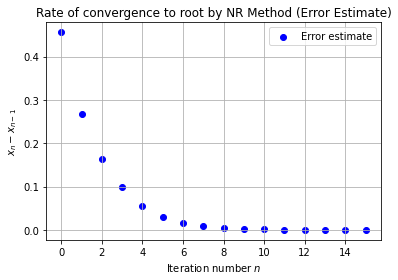

In [204]:
root, val_at_root, iterations, estimates, errors = rootNR_err(3, f1, f2, e=1e-8, Nt=1000)

itera = np.array([i for i in range(iterations)])

errors
plt.title("Rate of convergence to root by NR Method (Error Estimate)")
plt.grid()
plt.scatter(itera, errors, color='b', label="Error estimate")
plt.legend()
plt.ylabel(r"$x_n - x_{n-1}$")
plt.xlabel(r"Iteration number $n$")
plt.show()

### Error estimate value

In [206]:
print("The error estimate as the difference between the estimates of the last two iterations is", errors[iterations-1:])

The error estimate as the difference between the estimates of the last two iterations is [3.29167187e-05]


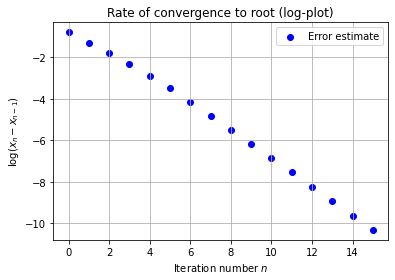

In [194]:
plt.title("Rate of convergence to root (log-plot)")
plt.grid()
plt.scatter(itera, np.log(errors), color='b', label="Error estimate")
plt.legend()
plt.ylabel(r"$\log({x_n - x_{n-1}})$")
plt.xlabel(r"Iteration number $n$")
plt.show()

Thus, we can see from both the linear-linear and log-linear plots above, the error between estimates of the roots at consecutive iterations decays out exponentially, at least for starting values quite closer to the actual root (3 in the case above).

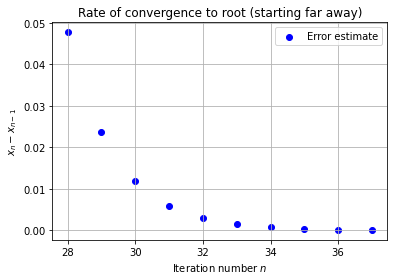

In [184]:
root, val_at_root, iterations, estimates, errors = rootNR_err(100, f1, f2, e=1e-8, Nt=1000)

itera = np.array([i for i in range(iterations)])

plt.title("Rate of convergence to root (starting far away)")
plt.grid()
plt.scatter(itera[-10:], errors[-10:], color='b', label="Error estimate")
plt.legend()
plt.ylabel(r"$x_n - x_{n-1}$")
plt.xlabel(r"Iteration number $n$")
plt.show()

However, for starting values much farther away from the actual root, the error in the initial estimates varies haphazardly and is very large. However, as we progress with more and more iterations, it eventually settles down into the same exponential decay as observed in the earlier case. The above graph shows this fact, since it plots the last 10 error estimates only (see x axis for iteration numbers), while starting NR method at 100.